<a href="https://colab.research.google.com/github/RoRdil31/Data-Science-Learning-as-a-Project/blob/main/3_%ED%83%90%EC%83%89%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EB%AA%A8%EB%8D%B8%EC%84%B1%EB%8A%A5_%EA%B0%9C%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from google.colab import drive
drive.mount('/content/mnt/')

import os

os.chdir('/content/mnt/MyDrive/Colab Notebooks/Boostcourse_Project_DS')
print(os.getcwd())


df = pd.read_csv("data/diabetes.csv")
df.shape

Drive already mounted at /content/mnt/; to attempt to forcibly remount, call drive.mount("/content/mnt/", force_remount=True).
/content/mnt/MyDrive/Colab Notebooks/Boostcourse_Project_DS


(768, 9)

# Feature Engineering

## 수치형 변수를 범주형 변수로 만들기

In [ ]:
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [ ]:
# One-Hot-Encoding (범주 -> 수치로 바꿀 때를 encoding이라고 함)
# 수치 -> 범주 -> 수치로 바꿈

df['Age_low'] = df['Age']<30
df['Age_middle'] = (df['Age']>=30) & (df['Age']<=60)
df['Age_high'] = df['Age']>60

df[['Age','Age_low','Age_middle','Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_high', ylabel='count'>

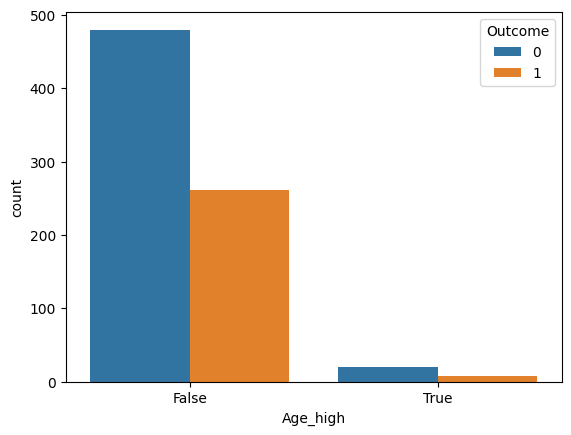

In [ ]:
sns.countplot(data=df,x="Age_high",hue="Outcome")

## 결측치 다루기


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
Insulin_nan                 0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_nan
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,141.753906
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,89.100847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,14.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,102.500000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,102.500000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,169.500000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,846.000000


In [ ]:
df['Insulin_nan'] = df['Insulin'].replace(0,np.nan)
df[['Insulin','Insulin_nan']].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [ ]:
df['Insulin_nan'].isnull().sum()

374

In [ ]:
# 결측치 비율

df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [ ]:
# df.groupby(['Outcome'])['Insulin','Insulin_nan'].describe()
df.groupby(['Outcome'])['Insulin','Insulin_nan'].agg(['mean','median'])

<ipython-input-70-7e031afc5406>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Outcome'])['Insulin','Insulin_nan'].agg(['mean','median'])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [ ]:
# 결측치 채우기

df.loc[(df['Outcome']==0) & (df['Insulin_nan'].isnull()),'Insulin_nan'] = 102.5
df.loc[(df['Outcome']==1) & (df['Insulin_nan'].isnull()),'Insulin_nan'] = 169.5

## 정규분포 만들기 (왜도, 첨도)
왜도 : 한쪽으로 치우쳐진 정도

첨도 : 뾰족한 정도

<ipython-input-72-74f2e5810842>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['Insulin'] > 0, 'Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

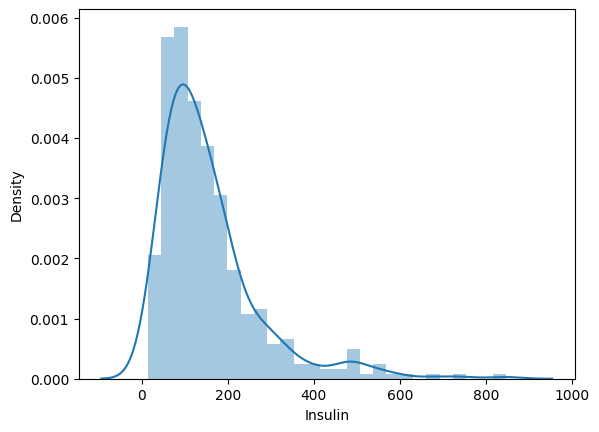

In [ ]:
sns.distplot(df.loc[df['Insulin'] > 0, 'Insulin'])

<ipython-input-73-fce94c119b12>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin']+1))


<Axes: xlabel='Insulin', ylabel='Density'>

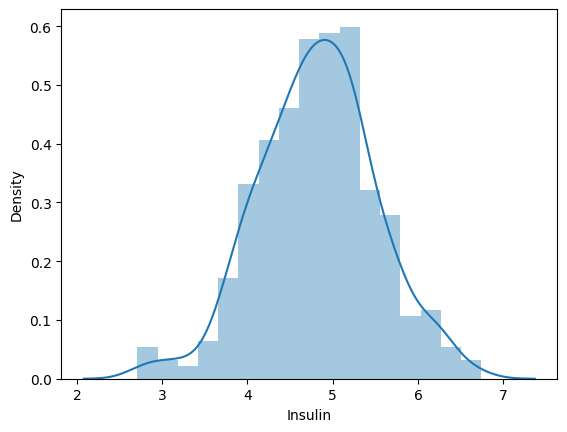

In [ ]:
sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin']+1))

<ipython-input-74-2bee21657fb8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_nan'])


<Axes: xlabel='Insulin_nan', ylabel='Density'>

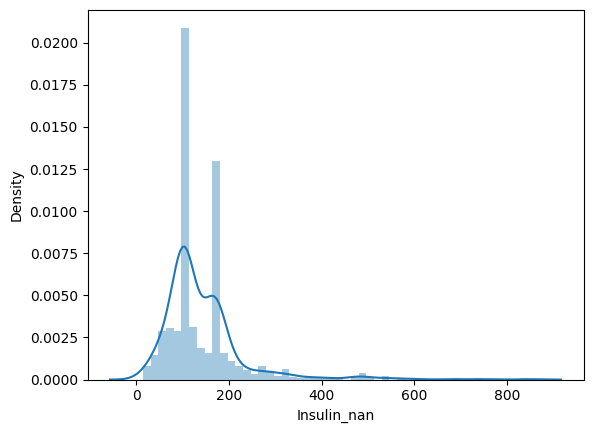

In [ ]:
sns.distplot(df['Insulin_nan'])

<ipython-input-75-25c9e9e312f1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_log'])


<Axes: xlabel='Insulin_log', ylabel='Density'>

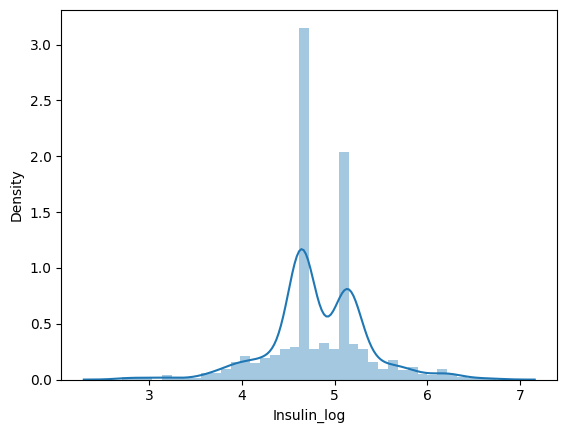

In [ ]:
df['Insulin_log'] = np.log(df['Insulin_nan']+1)
sns.distplot(df['Insulin_log'])

## 파생변수 만들기

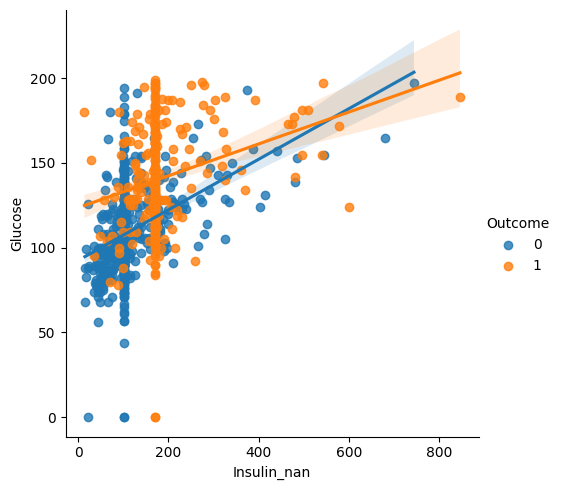

In [ ]:
sns.lmplot(data=df,x="Insulin_nan",y="Glucose",hue="Outcome")

In [ ]:
df['low_glu_insulin'] = (df['Glucose'] < 100) & (df['Insulin_nan'] <= 102.5)
df['low_glu_insulin'].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [ ]:
pd.crosstab(df['Outcome'],df['low_glu_insulin'])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


## 이상치(Outlier) 다루기

<Axes: xlabel='Insulin_nan'>

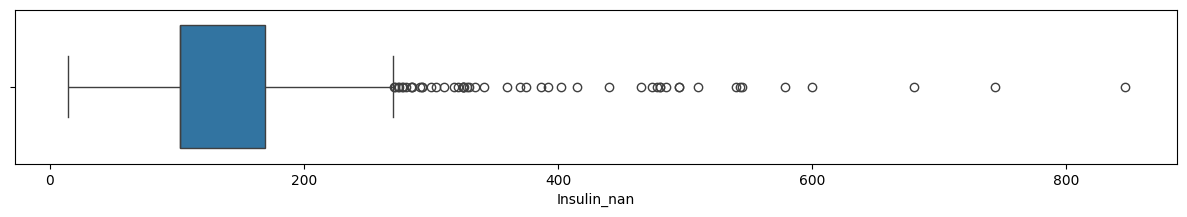

In [ ]:
plt.figure(figsize=(15,2))

sns.boxplot(x=df['Insulin_nan'])

In [ ]:
df['Insulin_nan'].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [ ]:
IQR3 = df['Insulin_nan'].quantile(0.75)
IQR1 = df['Insulin_nan'].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [ ]:
# IQR3보다 1.5IQR 이상 초과하는 값과
# IQR1보다 1.5IQR 이상 미달하는 값은
# 점, 원, 별표 등으로 표시함. (이상치 점)

OUT = IQR3 + (IQR * 1.5)
OUT

270.0

In [ ]:
df[df['Insulin_nan'] > OUT].shape

# 51개
# 전체 dataset에서 51개를 제거하면 많은 data 제거하는 것 같음.

(51, 16)

In [ ]:
# 따라서 600 이상인 data만 제거하기로 함.

df[df['Insulin_nan'] > 600].shape

(3, 16)

## 피처 스케일링


In [ ]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Glucose','DiabetesPedigreeFunction']])
scale = scaler.transform(df[['Glucose','DiabetesPedigreeFunction']])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [ ]:
# df[['Glucose','DiabetesPedigreeFunction']] = scale
# df[['Glucose','DiabetesPedigreeFunction']].head()

,Glucose,DiabetesPedigreeFunction
0,0.848324,0.468492
1,-1.123396,-0.365061
2,1.943724,0.604397
3,-0.998208,-0.920763
4,0.504055,5.484909


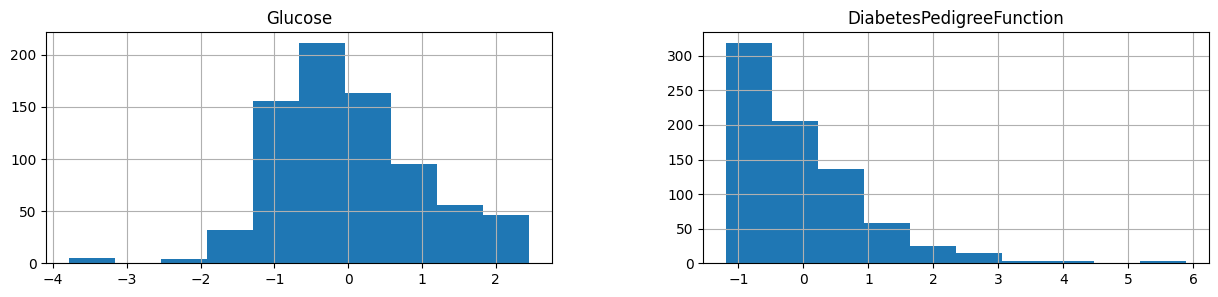

In [ ]:
h = df[['Glucose','DiabetesPedigreeFunction']].hist(figsize=(15,3))

## CSV 파일로 저장

In [ ]:
df.to_csv("data/diabetes_feature.csv",index=False)

In [ ]:
pd.read_csv('data/diabetes_feature.csv').head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 전처리한 피처를 CSV 파일로 저장하기

# 학습, 예측 데이터셋 나누기

In [ ]:
# df.head() # 따로 전처리 필요 없음을 확인.

split_count = int(df.shape[0]*0.8)
split_count

614

In [ ]:
train = df[:split_count].copy()
train.shape

(614, 16)

In [ ]:
train = train[train['Insulin_nan']<600]
train.shape

(610, 16)

In [ ]:
test = df[split_count:].copy()
test.shape

(154, 16)

In [ ]:
feature_names = train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_log')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

In [ ]:
label_name = "Outcome"
label_name

'Outcome'

In [ ]:
# @title train,test dataset 만들기

X_train = train[feature_names]
y_train = train[label_name]
print(X_train.shape)
print(y_train.shape)

X_test = test[feature_names]
y_test = test[label_name]
print(X_test.shape)
print(y_test.shape)


(610, 9)
(610,)
(154, 9)
(154,)


# ML algorithm 가져와서 training, predict 하기

In [ ]:


from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)
y_predict[:5]


array([1, 0, 0, 0, 1])

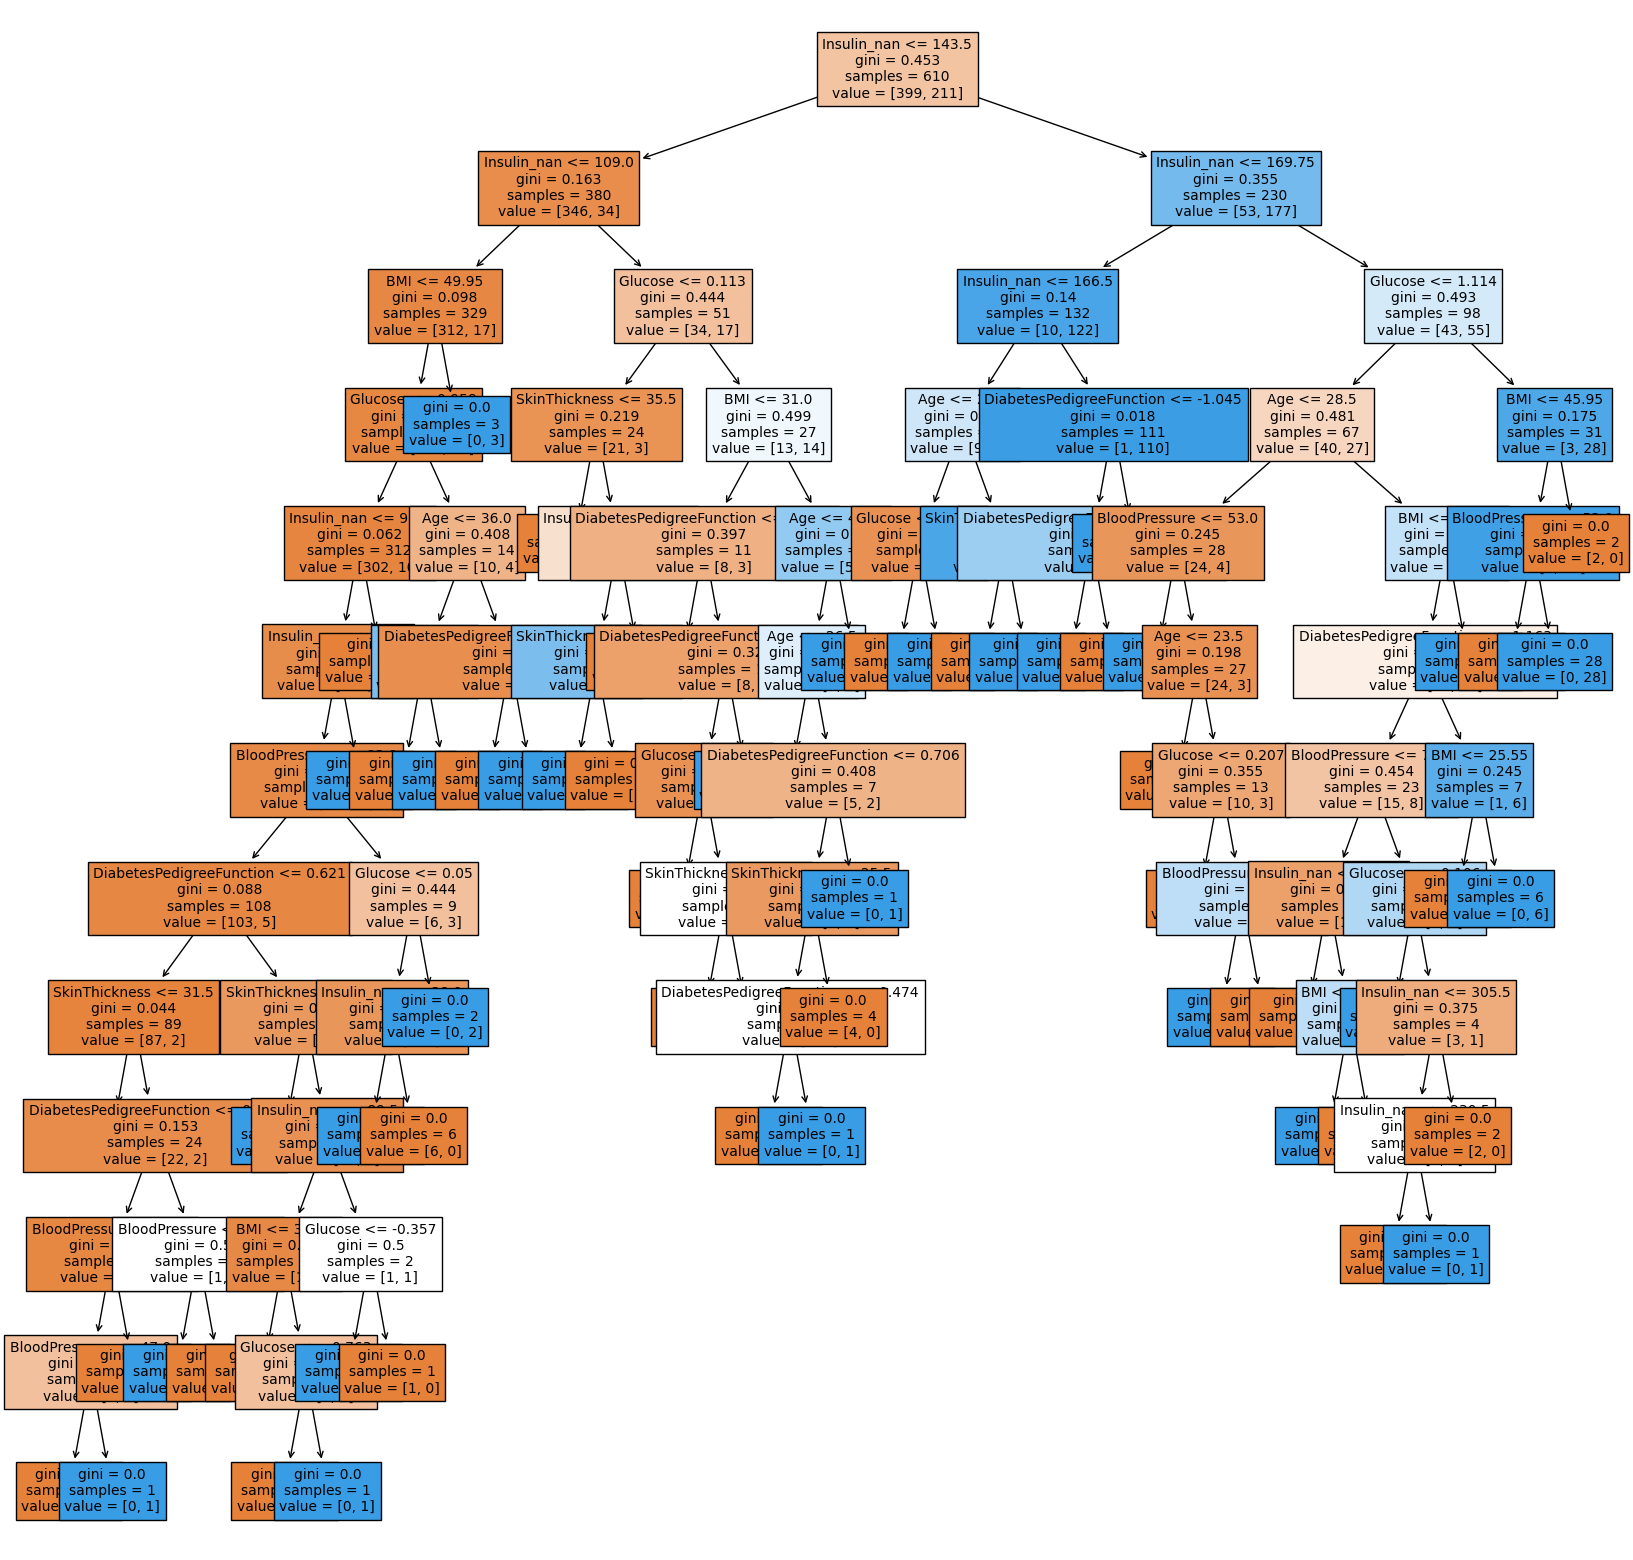

In [ ]:
# @title Tree algorithm 분석

from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)


# feature의 중요도 추출,시각화

[0.10110008 0.0435376  0.03101824 0.0716271  0.04591701 0.07910228
 0.         0.62769768 0.        ]


<Axes: >

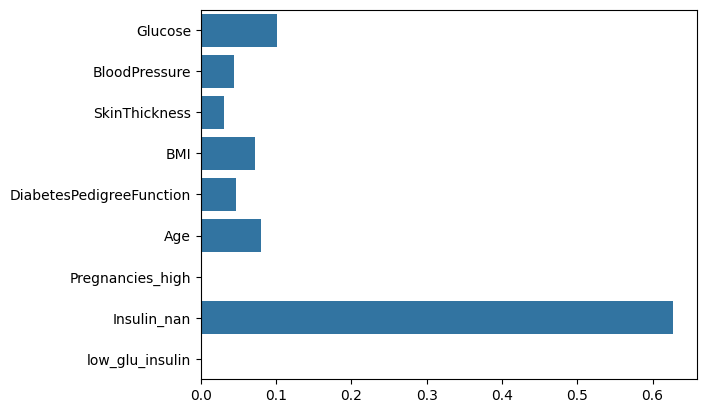

In [ ]:

print(model.feature_importances_)

sns.barplot(x=model.feature_importances_,y=feature_names)


# Accuracy 측정

In [ ]:
# 처음 44 ->
# Pregnancies(수치->범주로 feature engineering) 39 ->
# Age(나이 25세 기준 수치->범주로 ~) 50 성능 더 떨어짐 ->
# Age(나이 30세 기준 ~) 51 성능 떨어짐 ->
# (Age만 남기고 low/middle/high 제거) 인슐린 결측치->평균값으로 대체 24 성능 높아짐 ->
# (~) 인슐린 결측치->중앙값으로 대체 17 성능 높아짐
# (강의) (인슐린&글루코스 파생변수를 추가) 15
# (강의) (인슐린 수치 600이상 이상치 제거) 15

# 예측 틀린 개수
diff_count = abs(y_test - y_predict).sum()
print(diff_count)

17


In [ ]:
# 71 -> 85점 (인슐린 결측치를 평균으로 대체)
# 71 -> 88점 (인슐린 결측치를 중앙값으로 대체)
# (강의에서) -> 90점 (인슐린&글루코스 상관계수로 파생변수를 생성)

###################### 방법 1 : 직접 구하기

# 예측 정확도
print((len(y_test)-diff_count)/len(y_test))
print()


###################### 방법 2 : import 해서 구하기
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_predict)*100)
print()

###################### 방법 3 : model이 가진 것 사용

model.score(X_test,y_test)*100
# print()



0.8896103896103896

88.96103896103897



88.96103896103897